In [122]:
!pip install keras
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

In [123]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [124]:
file_path = '/content/drive/My Drive/Data/creditcard.csv'
df = pd.read_csv(file_path)

In [125]:
df.shape

(284807, 31)

In [126]:
df.isnull().values.any()

np.False_

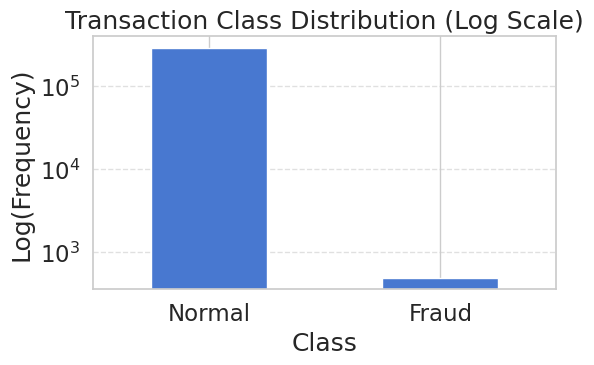

In [127]:
count_classes = pd.Series(df['Class'].values).value_counts()

plt.figure(figsize=(6, 4))
count_classes.plot(kind='bar', rot=0)
plt.yscale('log')  # Set y-axis to log scale
plt.title("Transaction Class Distribution (Log Scale)")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Log(Frequency)")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [128]:
frauds = df[df.Class == 1]
normal = df[df.Class == 0]

In [129]:
frauds.shape

(492, 31)

In [130]:
normal.shape

(284315, 31)

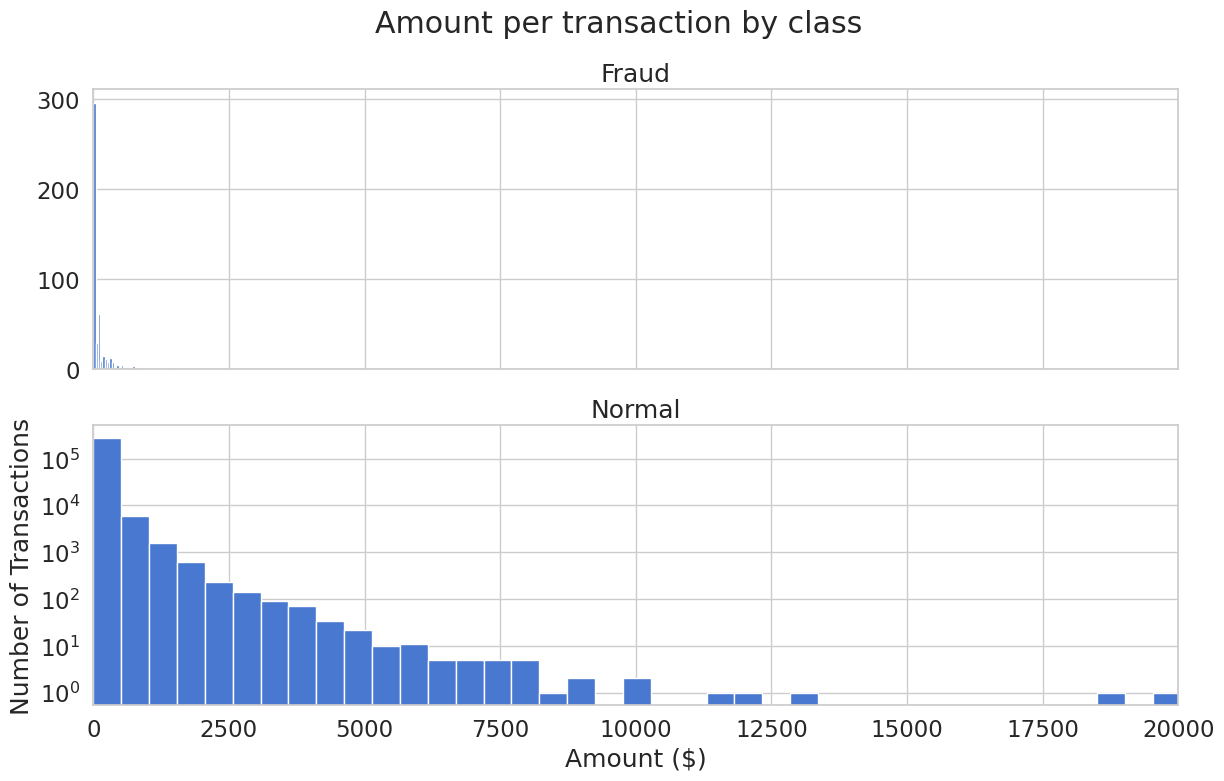

In [131]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')

bins = 50

ax1.hist(frauds.Amount, bins = bins)
ax1.set_title('Fraud')

ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

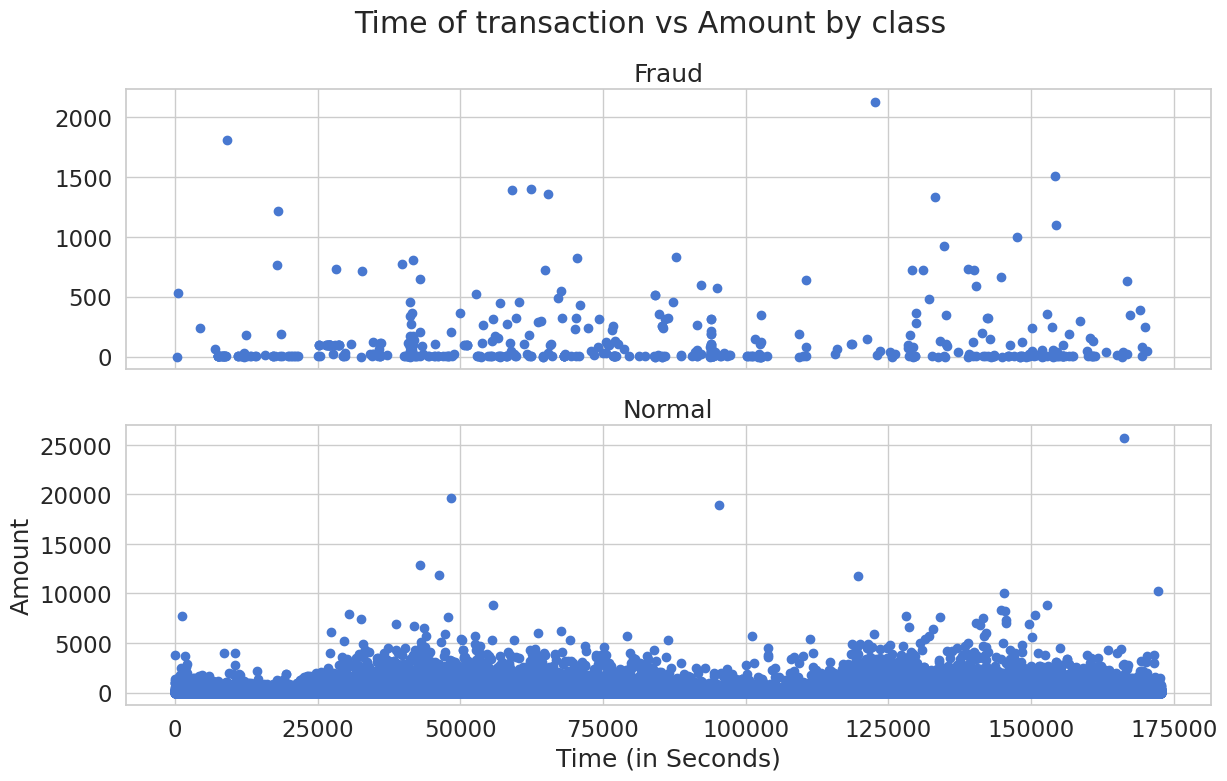

In [132]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')

ax1.scatter(frauds.Time, frauds.Amount)
ax1.set_title('Fraud')

ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [133]:
from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

X = df.iloc[:,:-1]
y = df['Class']

print("X and y sizes, respectively:", len(X), len(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)
print("Train and test sizes, respectively:", len(X_train), len(y_train), "|", len(X_test), len(y_test))
print("Total number of frauds:", len(y.loc[df['Class'] == 1]), len(y.loc[df['Class'] == 1])/len(y))
print("Number of frauds on y_test:", len(y_test.loc[df['Class'] == 1]), len(y_test.loc[df['Class'] == 1]) / len(y_test))
print("Number of frauds on y_train:", len(y_train.loc[df['Class'] == 1]), len(y_train.loc[df['Class'] == 1])/len(y_train))

X and y sizes, respectively: 284807 284807
Train and test sizes, respectively: 185124 185124 | 99683 99683
Total number of frauds: 492 0.001727485630620034
Number of frauds on y_test: 181 0.0018157559463499293
Number of frauds on y_train: 311 0.0016799550571508827


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy      : 0.9990
Precision     : 0.7104
Recall (Sens.): 0.7182
F1-Score      : 0.7143
ROC AUC       : 0.9112



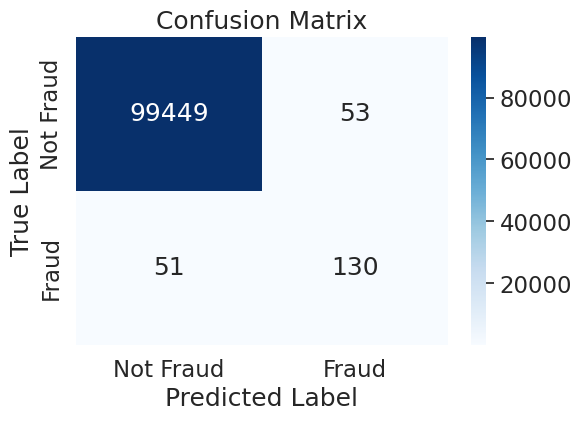

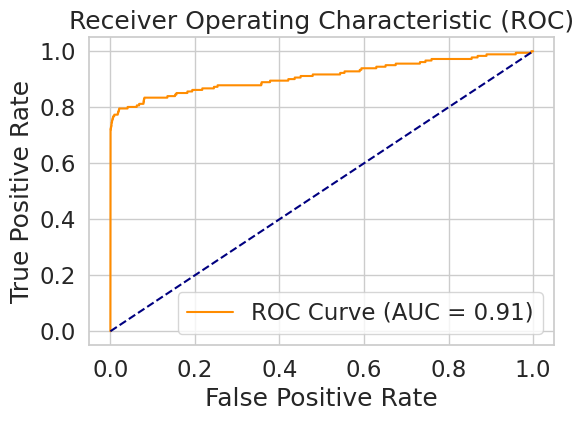

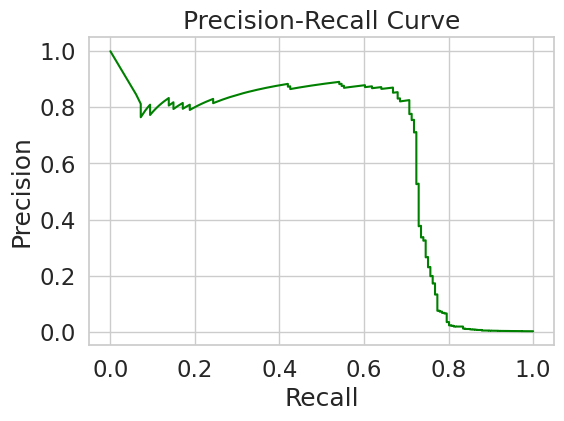

In [134]:
from sklearn import linear_model
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_curve, roc_auc_score,
    precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Train the model
logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(X_train, y_train)

# Predictions
y_predicted = logistic.predict(X_test)
y_proba = logistic.predict_proba(X_test)[:, 1]  # probabilities for ROC/PR

# Evaluation Metrics
lr_accuracy = accuracy_score(y_test, y_predicted)
lr_precision = precision_score(y_test, y_predicted)
lr_recall = recall_score(y_test, y_predicted)
lr_f1 = f1_score(y_test, y_predicted)
lr_roc_auc = roc_auc_score(y_test, y_proba)

# Print Scores
print(f"Accuracy      : {lr_accuracy:.4f}")
print(f"Precision     : {lr_precision:.4f}")
print(f"Recall (Sens.): {lr_recall:.4f}")
print(f"F1-Score      : {lr_f1:.4f}")
print(f"ROC AUC       : {lr_roc_auc:.4f}\n")

# Confusion Matrix
cm = confusion_matrix(y_test, y_predicted)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
print()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', label=f"ROC Curve (AUC = {lr_roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
print()

# Precision-Recall Curve
prec, rec, _ = precision_recall_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(rec, prec, color='green')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid(True)
plt.show()


Accuracy      : 0.9929
Precision     : 0.1567
Recall (Sens.): 0.6630
F1-Score      : 0.2534
ROC AUC       : 0.9723



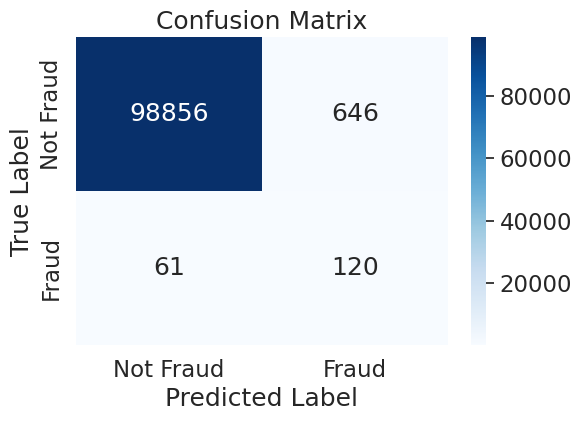

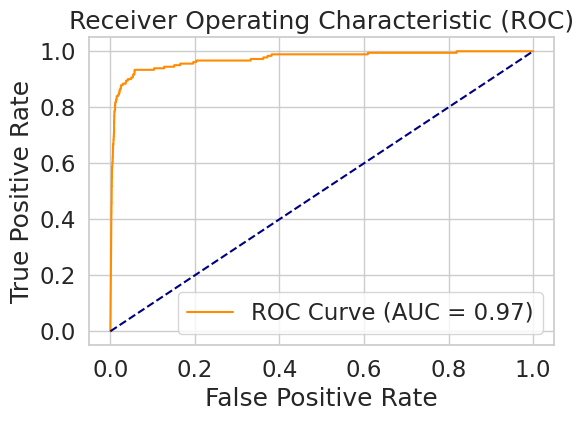

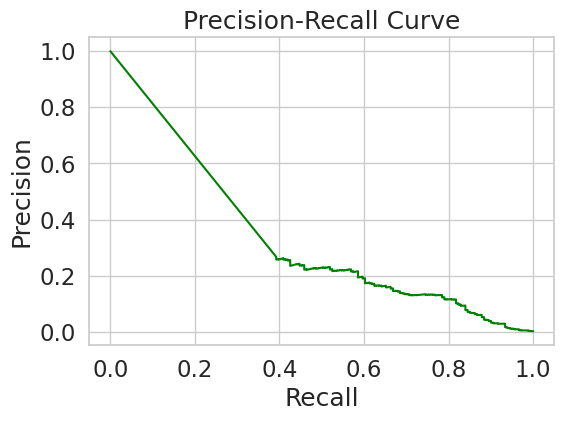

In [135]:
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB

# Train the model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predictions
y_predicted = nb_model.predict(X_test)
y_proba = nb_model.predict_proba(X_test)[:, 1]  # probabilities for ROC/PR

# Evaluation Metrics
nb_accuracy = accuracy_score(y_test, y_predicted)
nb_precision = precision_score(y_test, y_predicted)
nb_recall = recall_score(y_test, y_predicted)
nb_f1 = f1_score(y_test, y_predicted)
nb_roc_auc = roc_auc_score(y_test, y_proba)

# Print Scores
print(f"Accuracy      : {nb_accuracy:.4f}")
print(f"Precision     : {nb_precision:.4f}")
print(f"Recall (Sens.): {nb_recall:.4f}")
print(f"F1-Score      : {nb_f1:.4f}")
print(f"ROC AUC       : {nb_roc_auc:.4f}\n")

# Confusion Matrix
cm = confusion_matrix(y_test, y_predicted)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
print()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', label=f"ROC Curve (AUC = {nb_roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
print()

# Precision-Recall Curve
prec, rec, _ = precision_recall_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(rec, prec, color='green')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid(True)
plt.show()


Accuracy      : 0.9991
Precision     : 0.7554
Recall (Sens.): 0.7680
F1-Score      : 0.7616
ROC AUC       : 0.8838



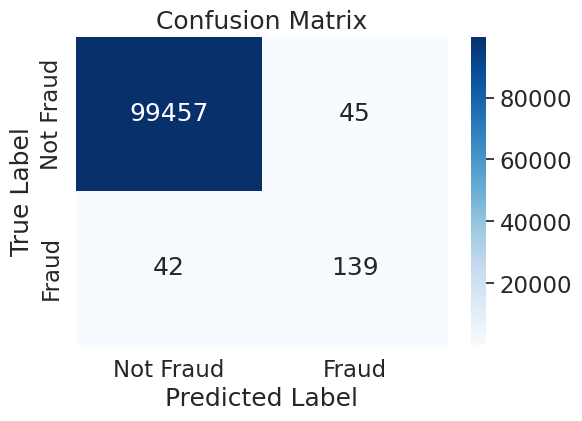

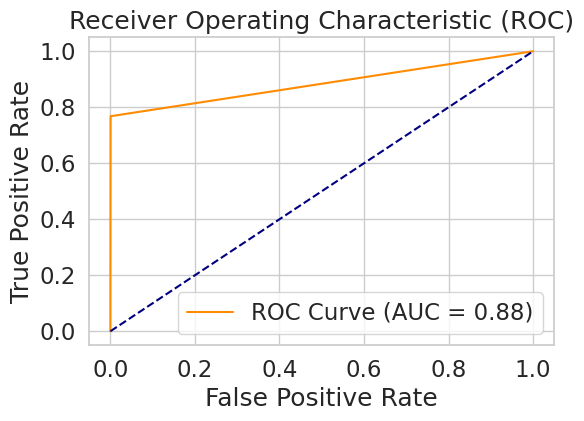

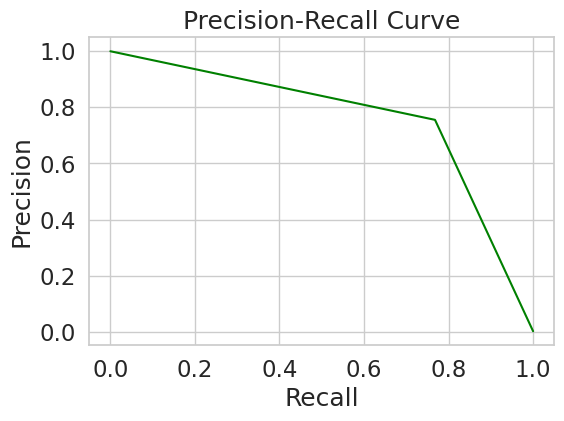

In [136]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# Train the model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Predictions
y_predicted = tree_model.predict(X_test)
y_proba_2d = tree_model.predict_proba(X_test)  # probabilities for ROC/PR
y_proba = y_proba_2d[:, 1]

# Evaluation Metrics
dt_accuracy = accuracy_score(y_test, y_predicted)
dt_precision = precision_score(y_test, y_predicted)
dt_recall = recall_score(y_test, y_predicted)
dt_f1 = f1_score(y_test, y_predicted)
dt_roc_auc = roc_auc_score(y_test, y_proba)

# Print Scores
print(f"Accuracy      : {dt_accuracy:.4f}")
print(f"Precision     : {dt_precision:.4f}")
print(f"Recall (Sens.): {dt_recall:.4f}")
print(f"F1-Score      : {dt_f1:.4f}")
print(f"ROC AUC       : {dt_roc_auc:.4f}\n")

# Confusion Matrix
cm = confusion_matrix(y_test, y_predicted)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
print()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', label=f"ROC Curve (AUC = {dt_roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
print()

# Precision-Recall Curve
prec, rec, _ = precision_recall_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(rec, prec, color='green')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid(True)
plt.show()


Accuracy      : 0.9995
Precision     : 0.9062
Recall (Sens.): 0.8011
F1-Score      : 0.8504
ROC AUC       : 0.9431



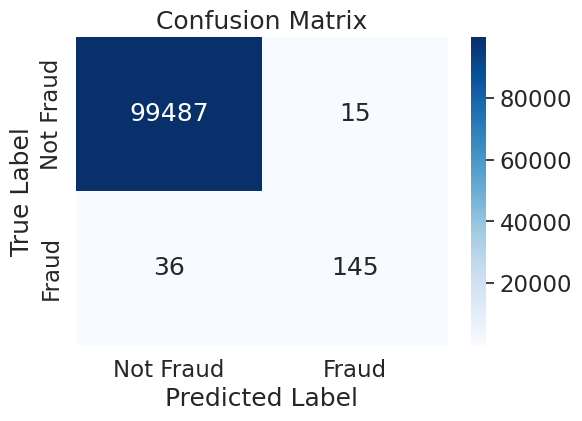

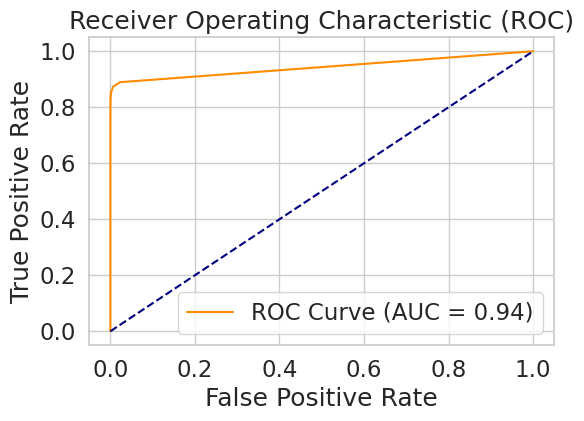

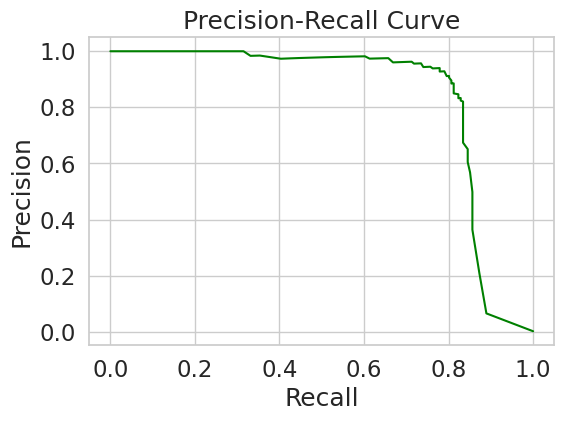

In [138]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_predicted = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]  # probabilities for ROC/PR

# Evaluation Metrics
rf_accuracy = accuracy_score(y_test, y_predicted)
rf_precision = precision_score(y_test, y_predicted)
rf_recall = recall_score(y_test, y_predicted)
rf_f1 = f1_score(y_test, y_predicted)
rf_roc_auc = roc_auc_score(y_test, y_proba)

# Print Scores
print(f"Accuracy      : {rf_accuracy:.4f}")
print(f"Precision     : {rf_precision:.4f}")
print(f"Recall (Sens.): {rf_recall:.4f}")
print(f"F1-Score      : {rf_f1:.4f}")
print(f"ROC AUC       : {rf_roc_auc:.4f}\n")

# Confusion Matrix
cm = confusion_matrix(y_test, y_predicted)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
print()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', label=f"ROC Curve (AUC = {rf_roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
print()

# Precision-Recall Curve
prec, rec, _ = precision_recall_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(rec, prec, color='green')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid(True)
plt.show()


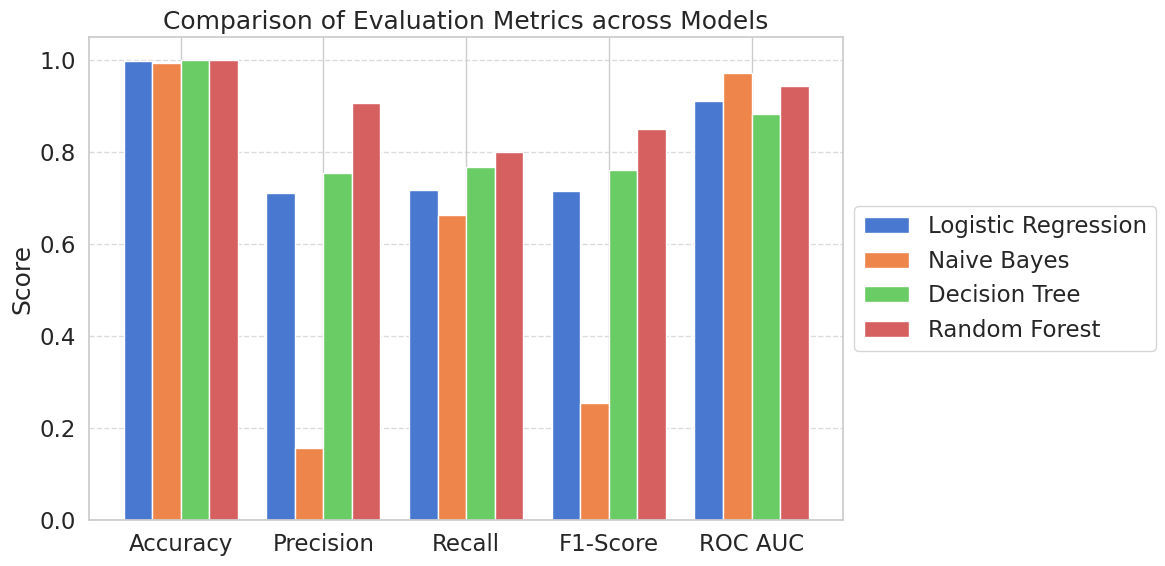

In [139]:
model_metrics = {
    "Logistic Regression": {
        "Accuracy": lr_accuracy,
        "Precision": lr_precision,
        "Recall": lr_recall,
        "F1-Score": lr_f1,
        "ROC AUC": lr_roc_auc
    },
    "Naive Bayes": {
        "Accuracy": nb_accuracy, #Replace with NB accuracy
        "Precision": nb_precision, #Replace with NB precision
        "Recall": nb_recall, #Replace with NB recall
        "F1-Score": nb_f1, #Replace with NB F1-score
        "ROC AUC": nb_roc_auc #Replace with NB ROC AUC
    },
    "Decision Tree": {
        "Accuracy": dt_accuracy, #Replace with DT accuracy
        "Precision": dt_precision, #Replace with DT precision
        "Recall": dt_recall, #Replace with DT recall
        "F1-Score": dt_f1, #Replace with DT F1-score
        "ROC AUC": dt_roc_auc #Replace with DT ROC AUC
    },
    "Random Forest": {
        "Accuracy": rf_accuracy,  # Replace with RF accuracy
        "Precision": rf_precision,  # Replace with RF precision
        "Recall": rf_recall,  # Replace with RF recall
        "F1-Score": rf_f1,  # Replace with RF F1-score
        "ROC AUC": rf_roc_auc  # Replace with RF ROC AUC
    }
}

import matplotlib.pyplot as plt
import numpy as np

# Metrics and Models
metrics = list(next(iter(model_metrics.values())).keys())
models = list(model_metrics.keys())

# Collect data in array form
metric_values = [[model_metrics[model][metric] for metric in metrics] for model in models]
metric_values = np.array(metric_values)

# Plotting grouped bars
x = np.arange(len(metrics))
bar_width = 0.2

plt.figure(figsize=(12, 6))
for i, model in enumerate(models):
    plt.bar(x + i * bar_width, metric_values[i], width=bar_width, label=model)

plt.xticks(x + bar_width * (len(models) - 1) / 2, metrics)
plt.ylabel("Score")
plt.title("Comparison of Evaluation Metrics across Models")

# Move legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [140]:
!pip install imbalanced-learn

from imblearn.over_sampling import SMOTE

X = df.iloc[:,:-1]
y = df['Class']

print("X and y sizes, respectively:", len(X), len(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)
print("Train and test sizes, respectively:", len(X_train), len(y_train), "|", len(X_test), len(y_test))
print("Total number of frauds:", len(y.loc[df['Class'] == 1]), len(y.loc[df['Class'] == 1])/len(y))
print("Number of frauds on y_test:", len(y_test.loc[df['Class'] == 1]), len(y_test.loc[df['Class'] == 1]) / len(y_test))
print("Number of frauds on y_train:", len(y_train.loc[df['Class'] == 1]), len(y_train.loc[df['Class'] == 1])/len(y_train))

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print("Number of frauds after SMOTE on y_train:", sum(y_train_resampled == 1), sum(y_train_resampled == 1) / len(y_train_resampled))


X and y sizes, respectively: 284807 284807
Train and test sizes, respectively: 185124 185124 | 99683 99683
Total number of frauds: 492 0.001727485630620034
Number of frauds on y_test: 158 0.001585024527752977
Number of frauds on y_train: 334 0.0018041961063935525
Number of frauds after SMOTE on y_train: 184790 0.5


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy      : 0.9835
Precision     : 0.0785
Recall (Sens.): 0.8734
F1-Score      : 0.1440
ROC AUC       : 0.9697



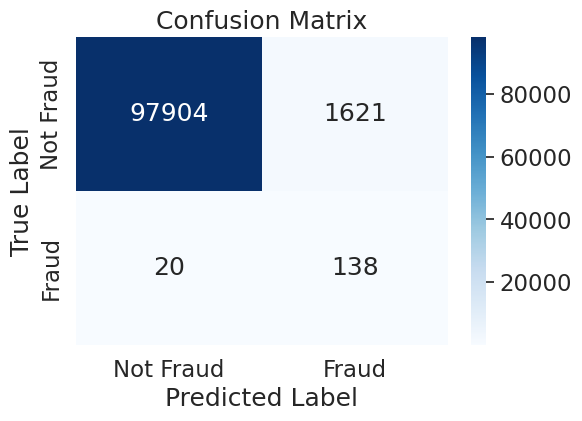

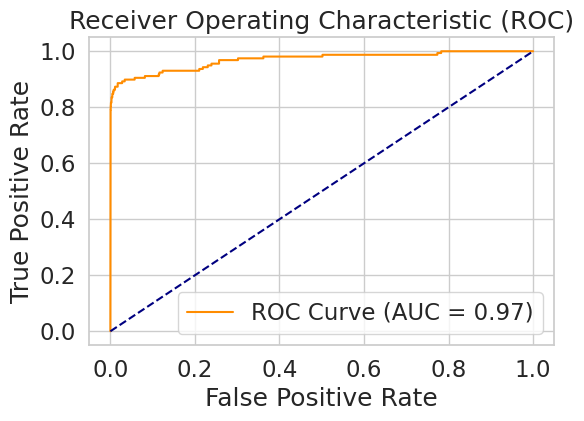

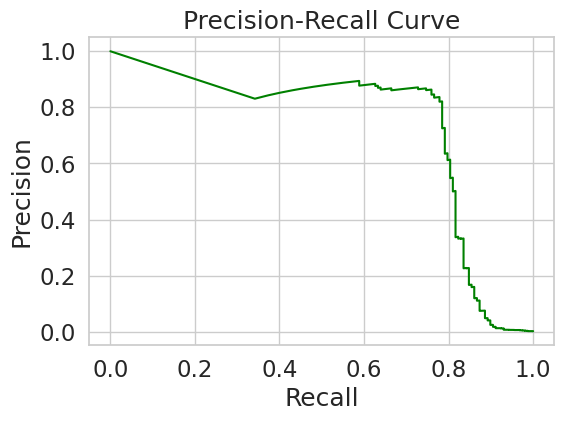

In [141]:
from sklearn import linear_model
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_curve, roc_auc_score,
    precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Train the model
logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(X_train_resampled, y_train_resampled)

# Predictions
y_predicted = logistic.predict(X_test)
y_proba = logistic.predict_proba(X_test)[:, 1]  # probabilities for ROC/PR

# Evaluation Metrics
sm_lr_accuracy = accuracy_score(y_test, y_predicted)
sm_lr_precision = precision_score(y_test, y_predicted)
sm_lr_recall = recall_score(y_test, y_predicted)
sm_lr_f1 = f1_score(y_test, y_predicted)
sm_lr_roc_auc = roc_auc_score(y_test, y_proba)

# Print Scores
print(f"Accuracy      : {sm_lr_accuracy:.4f}")
print(f"Precision     : {sm_lr_precision:.4f}")
print(f"Recall (Sens.): {sm_lr_recall:.4f}")
print(f"F1-Score      : {sm_lr_f1:.4f}")
print(f"ROC AUC       : {sm_lr_roc_auc:.4f}\n")

# Confusion Matrix
cm = confusion_matrix(y_test, y_predicted)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
print()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', label=f"ROC Curve (AUC = {sm_lr_roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
print()

# Precision-Recall Curve
prec, rec, _ = precision_recall_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(rec, prec, color='green')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid(True)
plt.show()


Accuracy      : 0.9923
Precision     : 0.1341
Recall (Sens.): 0.7025
F1-Score      : 0.2252
ROC AUC       : 0.9486



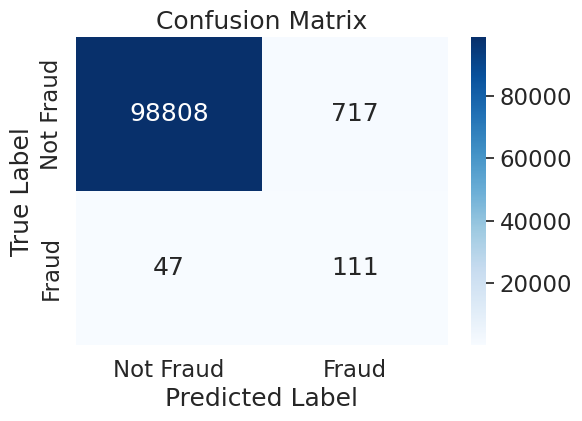

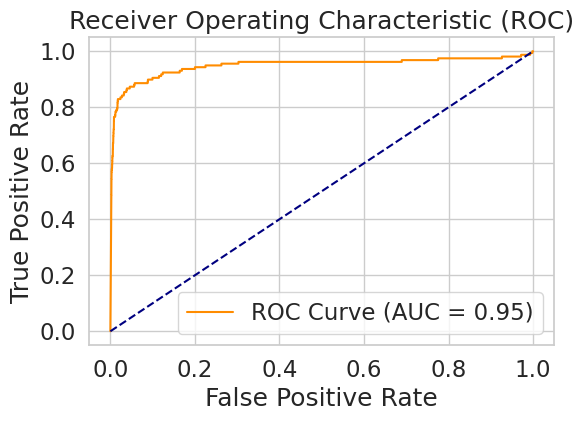

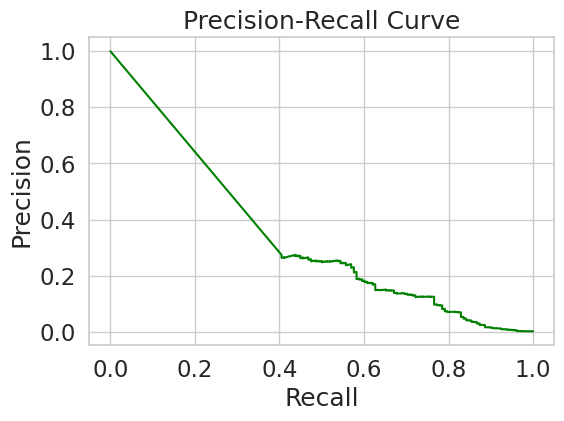

In [142]:
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB

# Train the model
nb_model = GaussianNB()
nb_model.fit(X_train_resampled, y_train_resampled)

# Predictions
y_predicted = nb_model.predict(X_test)
y_proba = nb_model.predict_proba(X_test)[:, 1]  # probabilities for ROC/PR

# Evaluation Metrics
sm_nb_accuracy = accuracy_score(y_test, y_predicted)
sm_nb_precision = precision_score(y_test, y_predicted)
sm_nb_recall = recall_score(y_test, y_predicted)
sm_nb_f1 = f1_score(y_test, y_predicted)
sm_nb_roc_auc = roc_auc_score(y_test, y_proba)

# Print Scores
print(f"Accuracy      : {sm_nb_accuracy:.4f}")
print(f"Precision     : {sm_nb_precision:.4f}")
print(f"Recall (Sens.): {sm_nb_recall:.4f}")
print(f"F1-Score      : {sm_nb_f1:.4f}")
print(f"ROC AUC       : {sm_nb_roc_auc:.4f}\n")

# Confusion Matrix
cm = confusion_matrix(y_test, y_predicted)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
print()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', label=f"ROC Curve (AUC = {sm_nb_roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
print()

# Precision-Recall Curve
prec, rec, _ = precision_recall_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(rec, prec, color='green')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid(True)
plt.show()


Accuracy      : 0.9980
Precision     : 0.4173
Recall (Sens.): 0.7342
F1-Score      : 0.5321
ROC AUC       : 0.8663



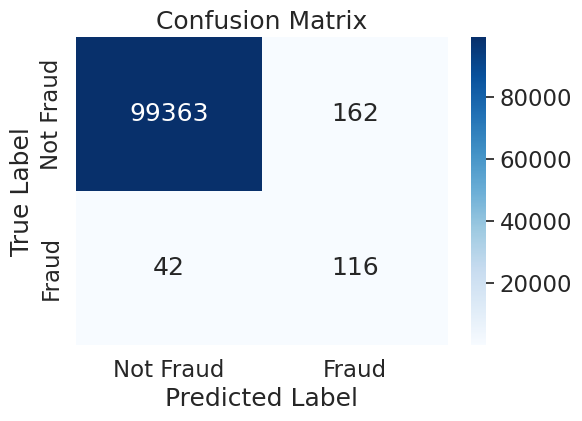

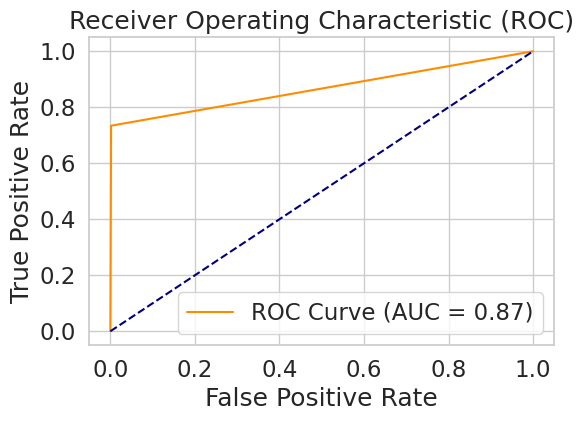

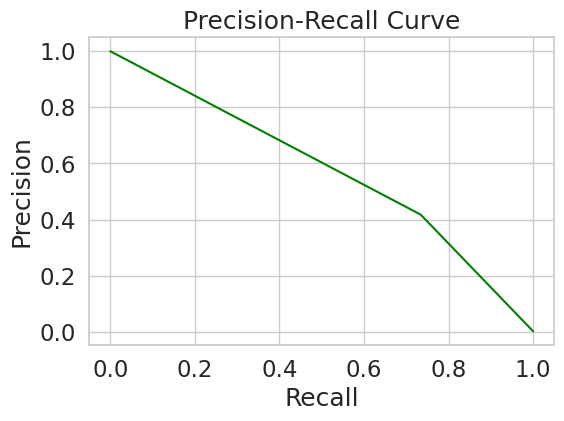

In [143]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# Train the model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train_resampled, y_train_resampled)

# Predictions
y_predicted = tree_model.predict(X_test)
y_proba_2d = tree_model.predict_proba(X_test)  # probabilities for ROC/PR
y_proba = y_proba_2d[:, 1]

# Evaluation Metrics
sm_dt_accuracy = accuracy_score(y_test, y_predicted)
sm_dt_precision = precision_score(y_test, y_predicted)
sm_dt_recall = recall_score(y_test, y_predicted)
sm_dt_f1 = f1_score(y_test, y_predicted)
sm_dt_roc_auc = roc_auc_score(y_test, y_proba)

# Print Scores
print(f"Accuracy      : {sm_dt_accuracy:.4f}")
print(f"Precision     : {sm_dt_precision:.4f}")
print(f"Recall (Sens.): {sm_dt_recall:.4f}")
print(f"F1-Score      : {sm_dt_f1:.4f}")
print(f"ROC AUC       : {sm_dt_roc_auc:.4f}\n")

# Confusion Matrix
cm = confusion_matrix(y_test, y_predicted)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
print()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', label=f"ROC Curve (AUC = {sm_dt_roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
print()

# Precision-Recall Curve
prec, rec, _ = precision_recall_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(rec, prec, color='green')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid(True)
plt.show()


Accuracy      : 0.9995
Precision     : 0.8699
Recall (Sens.): 0.8038
F1-Score      : 0.8355
ROC AUC       : 0.9780



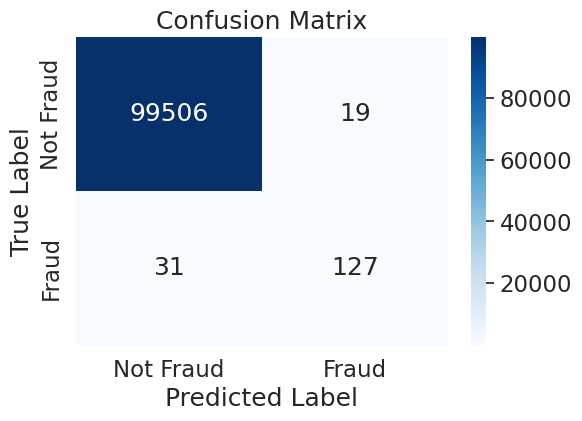

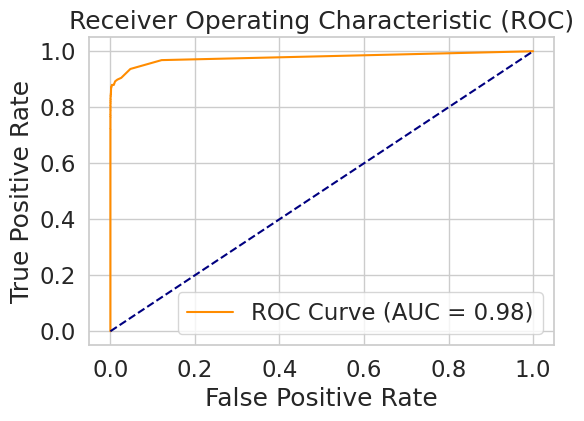

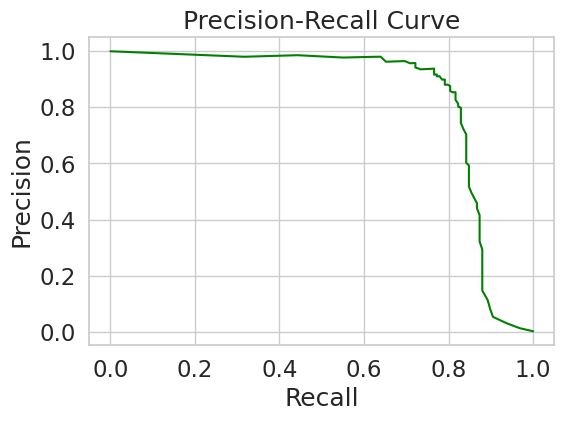

In [144]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Predictions
y_predicted = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]  # probabilities for ROC/PR

# Evaluation Metrics
sm_rf_accuracy = accuracy_score(y_test, y_predicted)
sm_rf_precision = precision_score(y_test, y_predicted)
sm_rf_recall = recall_score(y_test, y_predicted)
sm_rf_f1 = f1_score(y_test, y_predicted)
sm_rf_roc_auc = roc_auc_score(y_test, y_proba)

# Print Scores
print(f"Accuracy      : {sm_rf_accuracy:.4f}")
print(f"Precision     : {sm_rf_precision:.4f}")
print(f"Recall (Sens.): {sm_rf_recall:.4f}")
print(f"F1-Score      : {sm_rf_f1:.4f}")
print(f"ROC AUC       : {sm_rf_roc_auc:.4f}\n")

# Confusion Matrix
cm = confusion_matrix(y_test, y_predicted)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
print()

# ROC Curve
sm_rf_fpr, sm_rf_tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(sm_rf_fpr, sm_rf_tpr, color='darkorange', label=f"ROC Curve (AUC = {sm_rf_roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
print()

# Precision-Recall Curve
prec, rec, _ = precision_recall_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(rec, prec, color='green')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid(True)
plt.show()


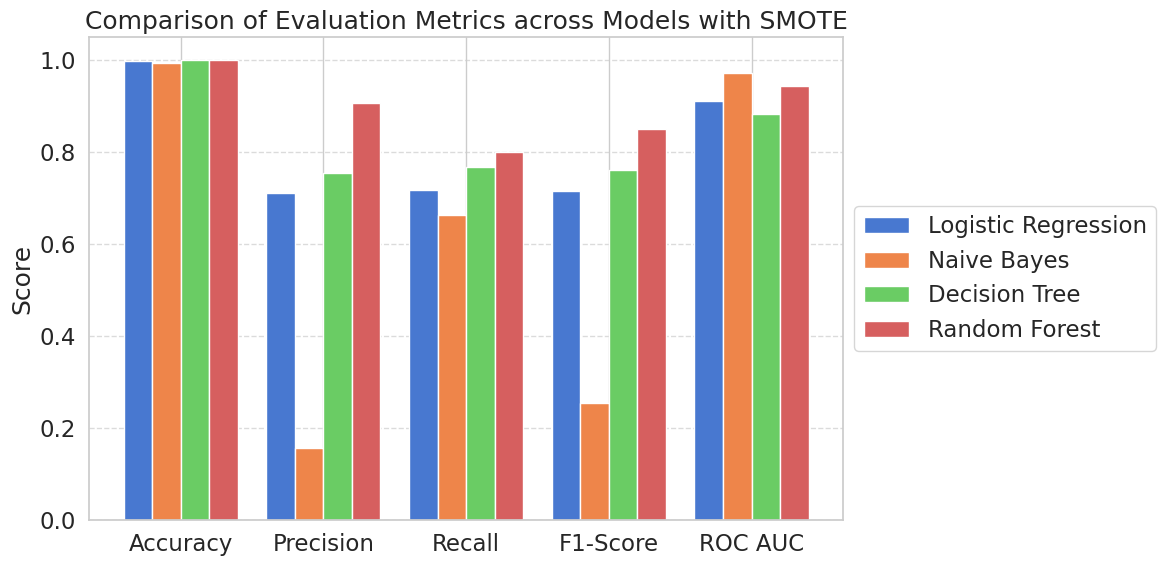

In [145]:
smote_model_metrics = {
    "Logistic Regression": {
        "Accuracy": sm_lr_accuracy,
        "Precision": sm_lr_precision,
        "Recall": sm_lr_recall,
        "F1-Score": sm_lr_f1,
        "ROC AUC": sm_lr_roc_auc
    },
    "Naive Bayes": {
        "Accuracy": sm_nb_accuracy, #Replace with NB accuracy
        "Precision": sm_nb_precision, #Replace with NB precision
        "Recall": sm_nb_recall, #Replace with NB recall
        "F1-Score": sm_nb_f1, #Replace with NB F1-score
        "ROC AUC": sm_nb_roc_auc #Replace with NB ROC AUC
    },
    "Decision Tree": {
        "Accuracy": sm_dt_accuracy, #Replace with DT accuracy
        "Precision": sm_dt_precision, #Replace with DT precision
        "Recall": sm_dt_recall, #Replace with DT recall
        "F1-Score": sm_dt_f1, #Replace with DT F1-score
        "ROC AUC": sm_dt_roc_auc #Replace with DT ROC AUC
    },
    "Random Forest": {
        "Accuracy": sm_rf_accuracy,  # Replace with RF accuracy
        "Precision": sm_rf_precision,  # Replace with RF precision
        "Recall": sm_rf_recall,  # Replace with RF recall
        "F1-Score": sm_rf_f1,  # Replace with RF F1-score
        "ROC AUC": sm_rf_roc_auc  # Replace with RF ROC AUC
    }
}

import matplotlib.pyplot as plt
import numpy as np

# Metrics and Models
metrics = list(next(iter(smote_model_metrics.values())).keys())
models = list(model_metrics.keys())

# Collect data in array form
metric_values = [[model_metrics[model][metric] for metric in metrics] for model in models]
metric_values = np.array(metric_values)

# Plotting grouped bars
x = np.arange(len(metrics))
bar_width = 0.2

plt.figure(figsize=(12, 6))
for i, model in enumerate(models):
    plt.bar(x + i * bar_width, metric_values[i], width=bar_width, label=model)

plt.xticks(x + bar_width * (len(models) - 1) / 2, metrics)
plt.ylabel("Score")
plt.title("Comparison of Evaluation Metrics across Models with SMOTE")

# Move legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


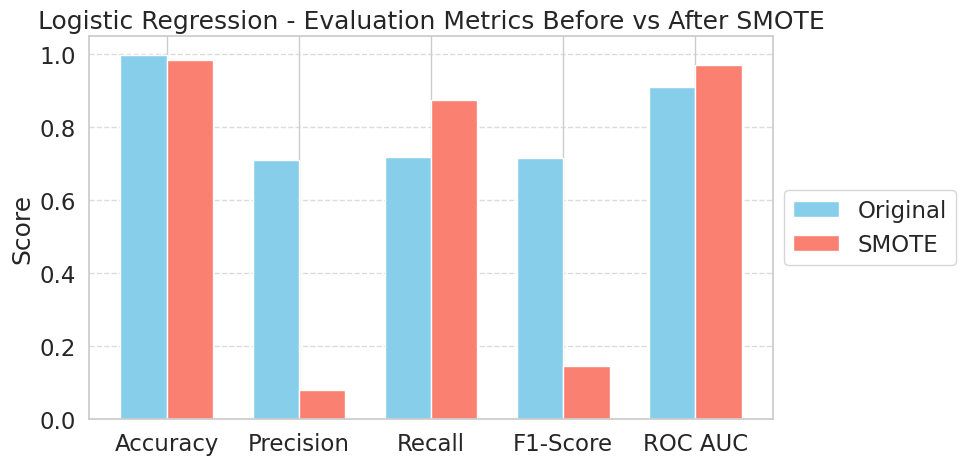

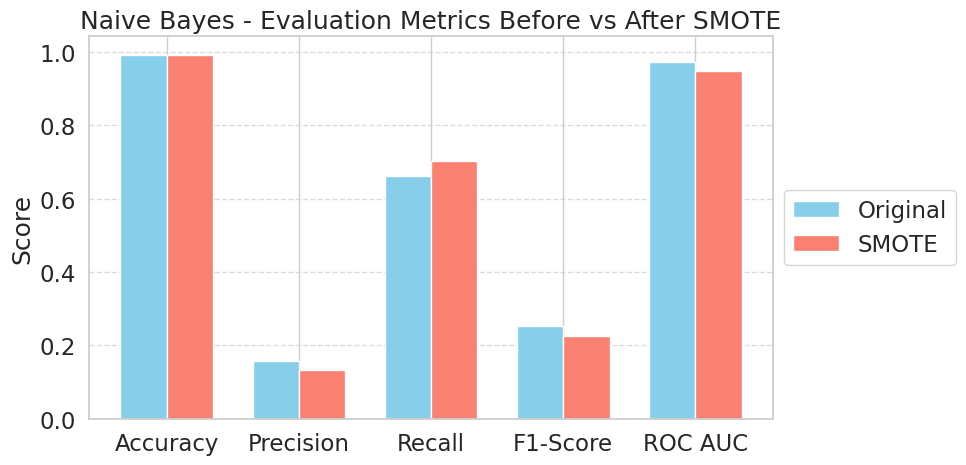

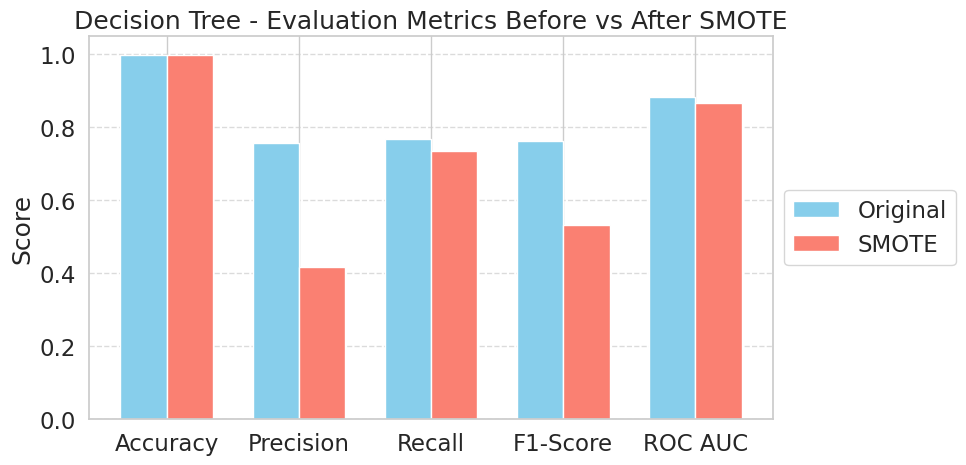

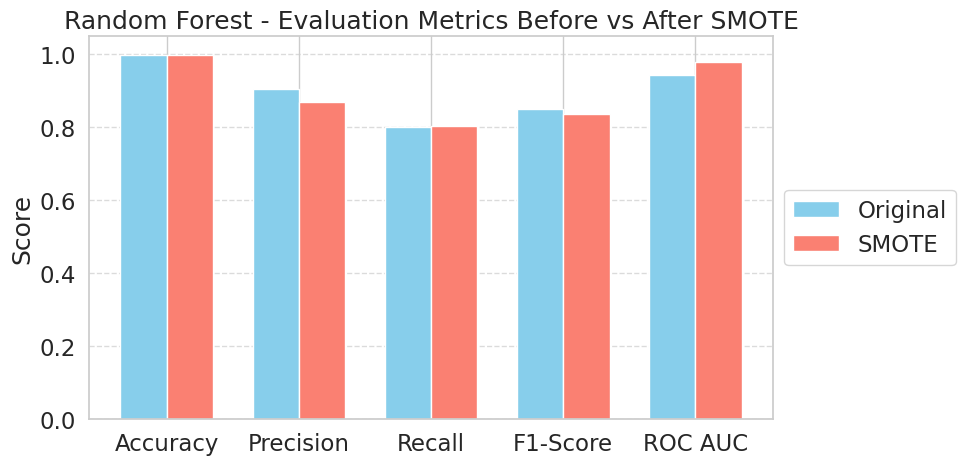

In [146]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics and Models
metrics = list(next(iter(model_metrics.values())).keys())
models = list(model_metrics.keys())

# Prepare values for before and after SMOTE
before_values = [[model_metrics[model][metric] for metric in metrics] for model in models]
after_values = [[smote_model_metrics[model][metric] for metric in metrics] for model in models]

# Plotting comparison
x = np.arange(len(metrics))  # positions for metrics
bar_width = 0.35

for i, model in enumerate(models):
    plt.figure(figsize=(10, 5))
    plt.bar(x - bar_width/2, before_values[i], width=bar_width, label='Original', color='skyblue')
    plt.bar(x + bar_width/2, after_values[i], width=bar_width, label='SMOTE', color='salmon')

    plt.xticks(x, metrics)
    plt.ylabel("Score")
    plt.title(f"{model} - Evaluation Metrics Before vs After SMOTE")

    # Move legend outside the plot
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


# Autoencoders - Unsupervised Learning

In [147]:
from sklearn.preprocessing import StandardScaler

data = df.drop(['Time'], axis=1)

data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))

In [148]:
X_train, X_test = train_test_split(data, test_size=0.2, random_state=RANDOM_SEED)
X_train = X_train[X_train.Class == 0]
X_train = X_train.drop(['Class'], axis=1)

y_test = X_test['Class']
X_test = X_test.drop(['Class'], axis=1)

X_train = X_train.values
X_test = X_test.values
X_train.shape

(227451, 29)

In [149]:
input_dim = X_train.shape[1]
encoding_dim = 14
input_layer = Input(shape=(input_dim, ))

encoder = Dense(encoding_dim, activation="tanh",
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)

decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)

In [150]:
nb_epoch = 30
batch_size = 256

autoencoder.compile(optimizer='adam',
                    loss='mean_squared_error')

checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose=0,
                               save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)

history = autoencoder.fit(X_train, X_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test, X_test),
                    verbose=1,
                    callbacks=[checkpointer, tensorboard]).history

Epoch 1/30
871/889 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1104

889/889 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.1081 - val_loss: 0.9047
Epoch 2/30
867/889 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8531

889/889 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.8530 - val_loss: 0.8617
Epoch 3/30
889/889 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8130

889/889 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.8130 - val_loss: 0.8399
Epoch 4/30
888/889 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8187

889/889 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.8187 - val_loss: 0.8328
Epoch 5/30
881/889 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8034

889/889 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.8034 - val_loss: 0.8266
Epoch 6/30
875/889 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7909

889/889 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.7909 - val_loss: 0.8236
Epoch 7/30
873/889 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7924

889/889 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.7924 - val_loss: 0.8228
Epoch 8/30
867/889 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7792

889/889 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.7795 - val_loss: 0.8210
Epoch 9/30
871/889 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7831

889/889 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.7832 - val_loss: 0.8190
Epoch 10/30
869/889 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7889

889/889 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.7887 - val_loss: 0.8148
Epoch 11/30
889/889 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7704

889/889 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.7704 - val_loss: 0.8074
Epoch 12/30
883/889 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7695

889/889 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.7695 - val_loss: 0.8014
Epoch 13/30
870/889 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7744

889/889 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.7742 - val_loss: 0.7948
Epoch 14/30
885/889 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7487

889/889 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.7488 - val_loss: 0.7943
Epoch 15/30
883/889 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7537

889/889 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.7538 - val_loss: 0.7914
Epoch 16/30
872/889 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7474

889/889 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.7476 - val_loss: 0.7898
Epoch 17/30
878/889 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7424

889/889 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.7425 - val_loss: 0.7893
Epoch 18/30
881/889 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7638

889/889 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.7637 - val_loss: 0.7889
Epoch 19/30
889/889 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.7462 - val_loss: 0.7906
Epoch 20/30
889/889 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.7637 - val_loss: 0.7889
Epoch 21/30
876/889 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7597

889/889 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.7596 - val_loss: 0.7868
Epoch 22/30
889/889 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.7589 - val_loss: 0.7872
Epoch 23/30
889/889 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.7507 - val_loss: 0.7868
Epoch 24/30
884/889 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7610

889/889 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.7609 - val_loss: 0.7860
Epoch 25/30
870/889 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7491

889/889 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.7491 - val_loss: 0.7841
Epoch 26/30
889/889 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.7651 - val_loss: 0.7860
Epoch 27/30
889/889 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.7560 - val_loss: 0.7876
Epoch 28/30
889/889 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.7570 - val_loss: 0.7873
Epoch 29/30
889/889 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.7376 - val_loss: 0.7864
Epoch 30/30
889/889 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.7402 - val_loss: 0.7853


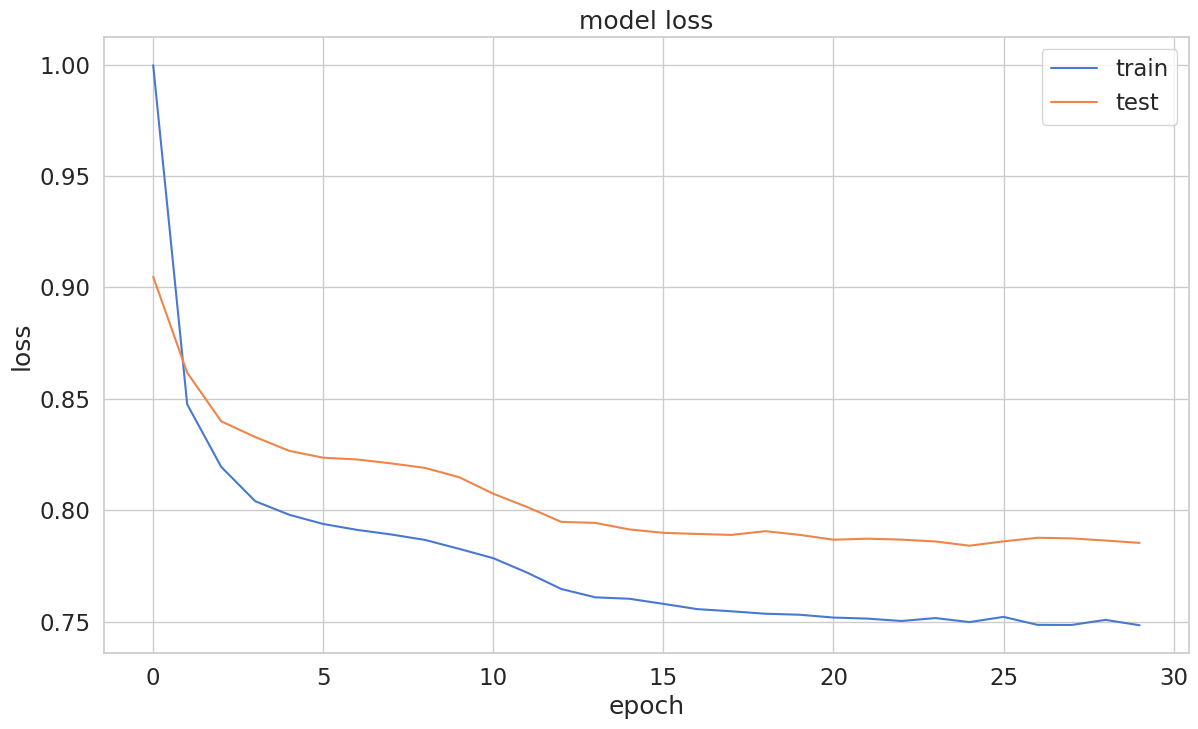

In [151]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [152]:
predictions = autoencoder.predict(X_test)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [153]:
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})

In [154]:
error_df.describe()

,reconstruction_error,true_class
count,56962.000000,56962.000000
mean,0.777210,0.001720
std,3.451974,0.041443
min,0.077976,0.000000
25%,0.254448,0.000000
50%,0.415701,0.000000
75%,0.649781,0.000000
max,251.419532,1.000000


Text(0.5, 1.0, 'Reconstruction error without fraud')

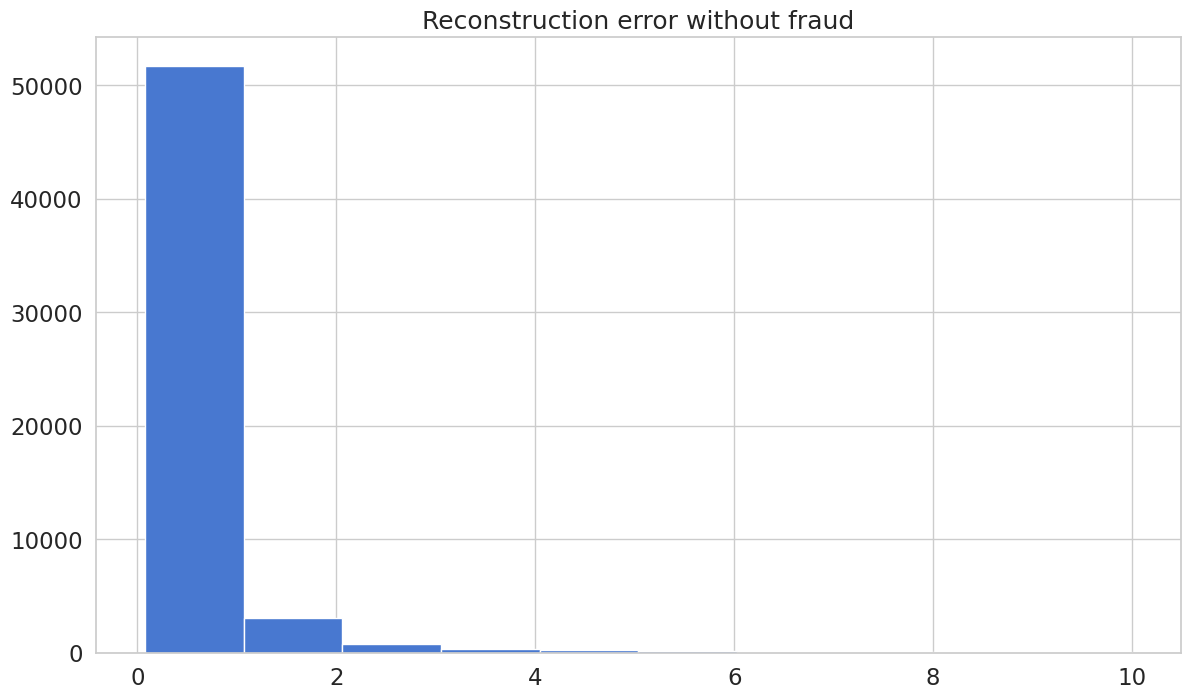

In [155]:
fig = plt.figure()
ax = fig.add_subplot(111)
normal_error_df = error_df[(error_df['true_class']==0) & (error_df['reconstruction_error'] < 10)]
_ = ax.hist(normal_error_df.reconstruction_error.values, bins=10)
plt.title('Reconstruction error without fraud')

Text(0.5, 1.0, 'Reconstruction error with fraud')

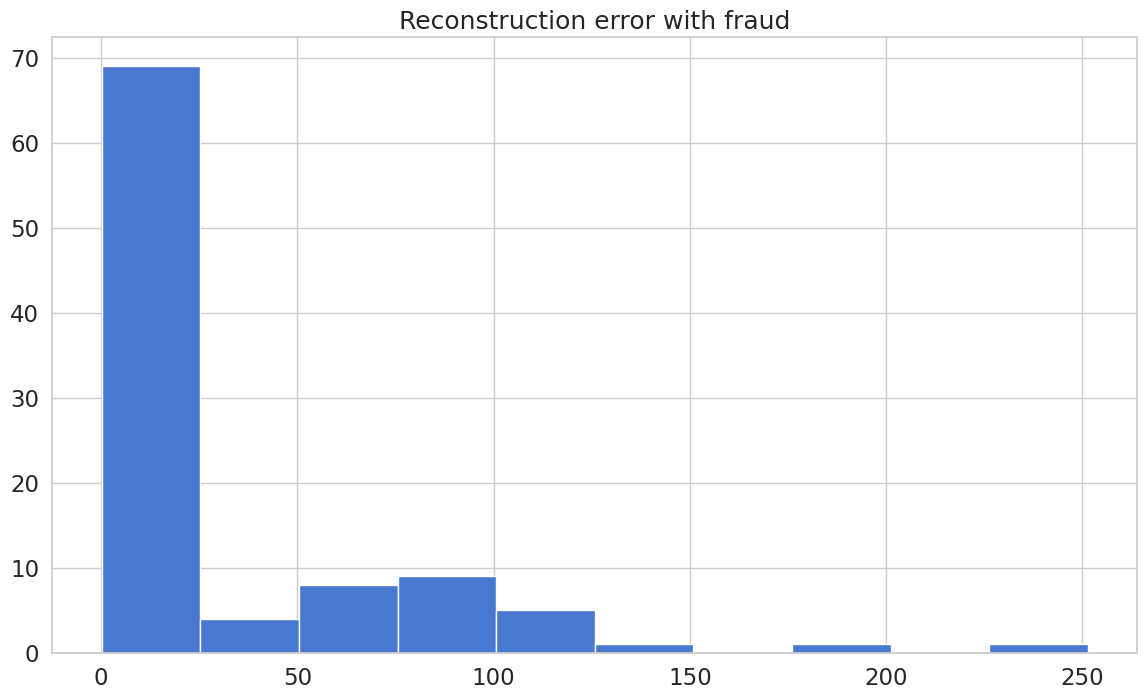

In [156]:
fig = plt.figure()
ax = fig.add_subplot(111)
fraud_error_df = error_df[error_df['true_class'] == 1]
_ = ax.hist(fraud_error_df.reconstruction_error.values, bins=10)
plt.title('Reconstruction error with fraud')

In [157]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

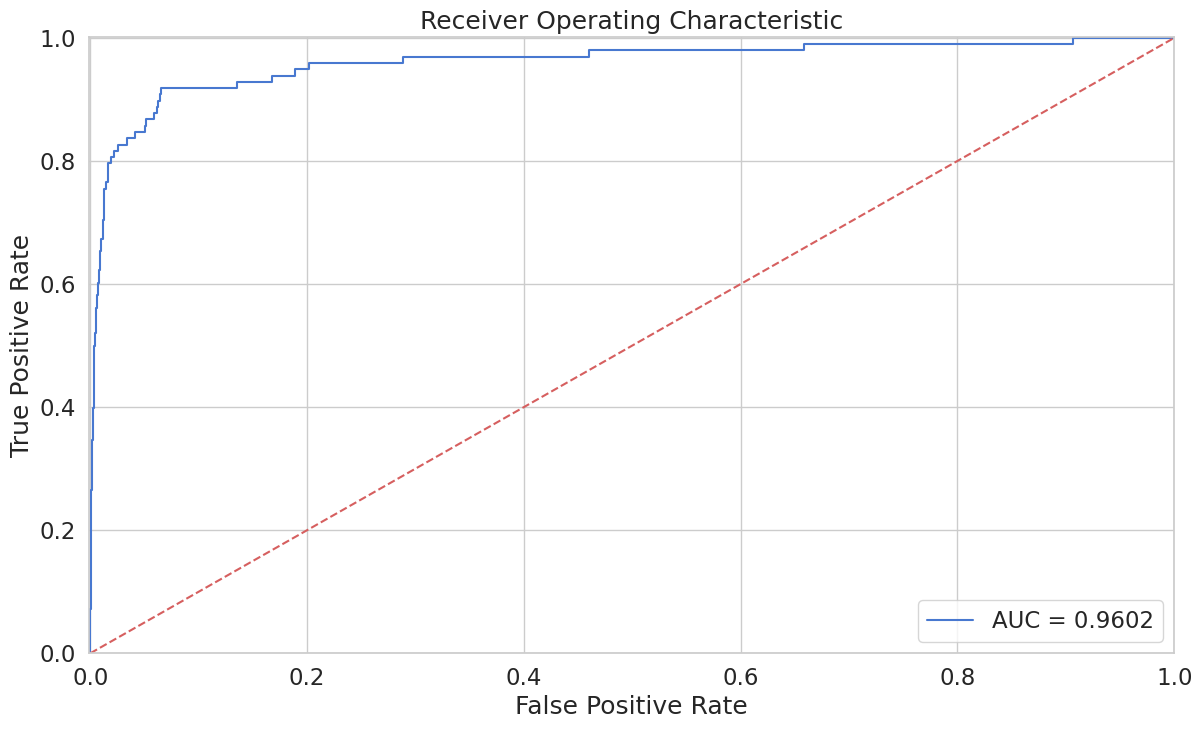

In [158]:
fpr_ae, tpr_ae, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc_ae = auc(fpr_ae, tpr_ae)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_ae, tpr_ae, label='AUC = %0.4f'% roc_auc_ae)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

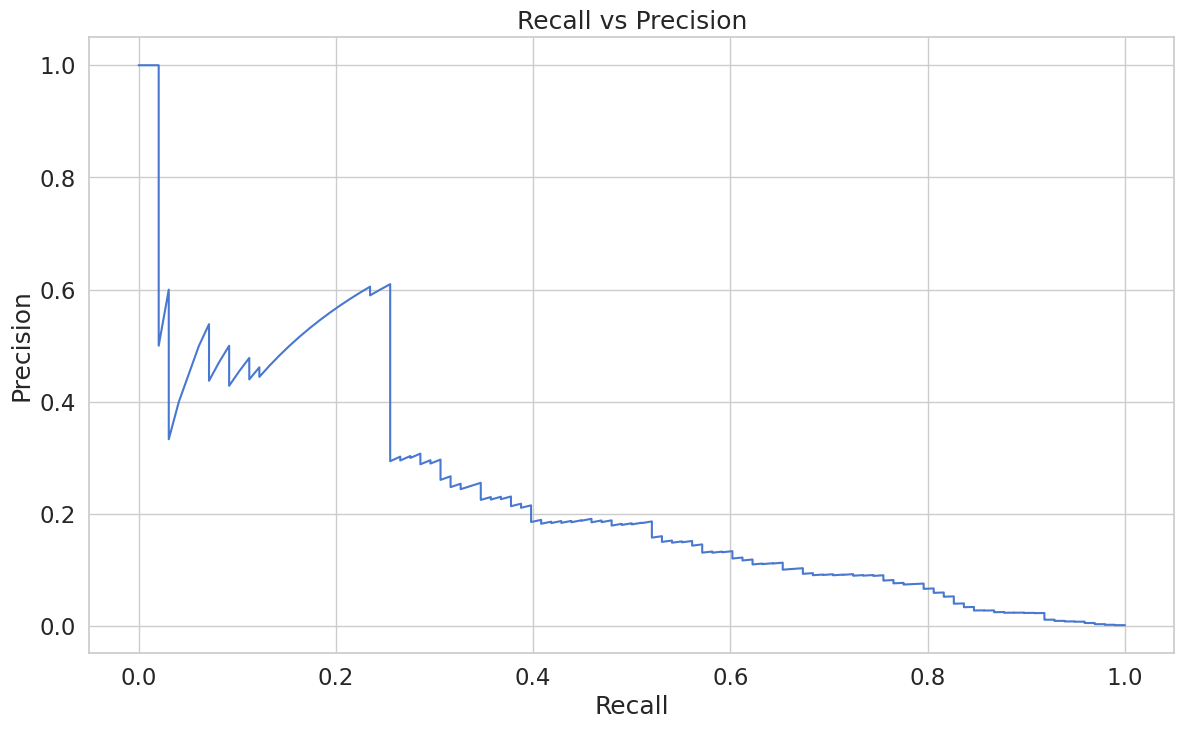

In [159]:
precision, recall, th = precision_recall_curve(error_df.true_class, error_df.reconstruction_error)
plt.plot(recall, precision, 'b', label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

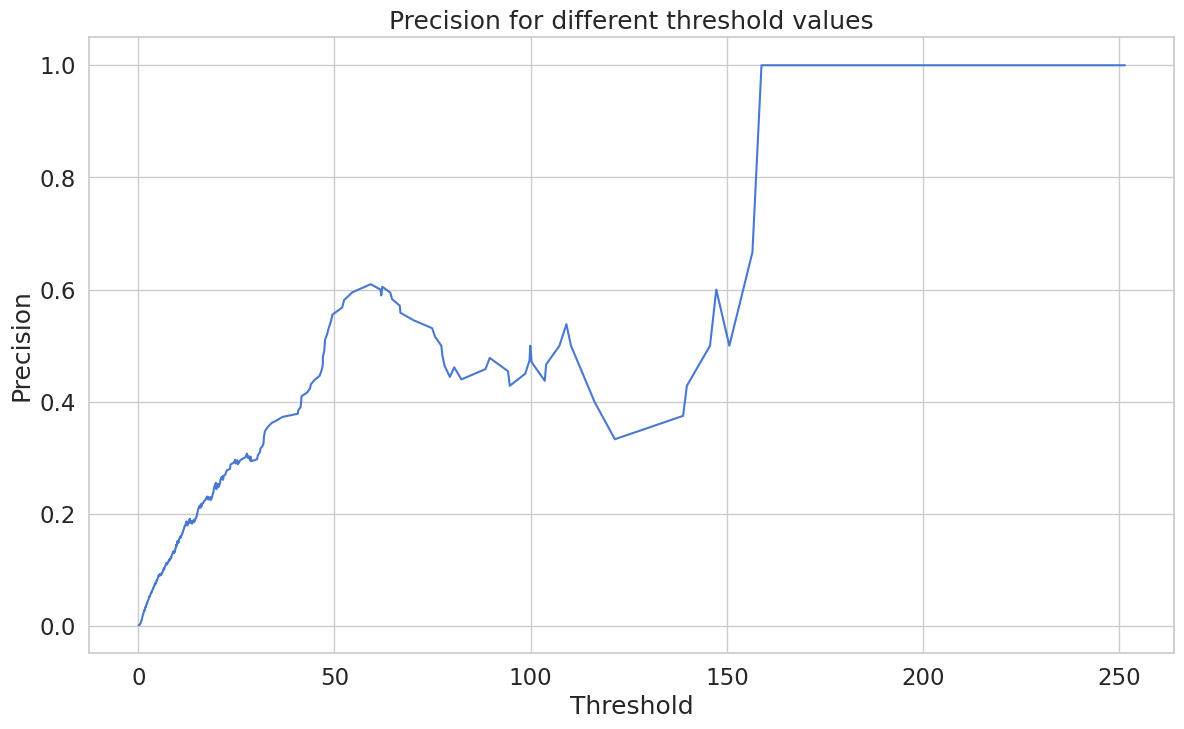

In [160]:
plt.plot(th, precision[1:], 'b', label='Threshold-Precision curve')
plt.title('Precision for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.show()

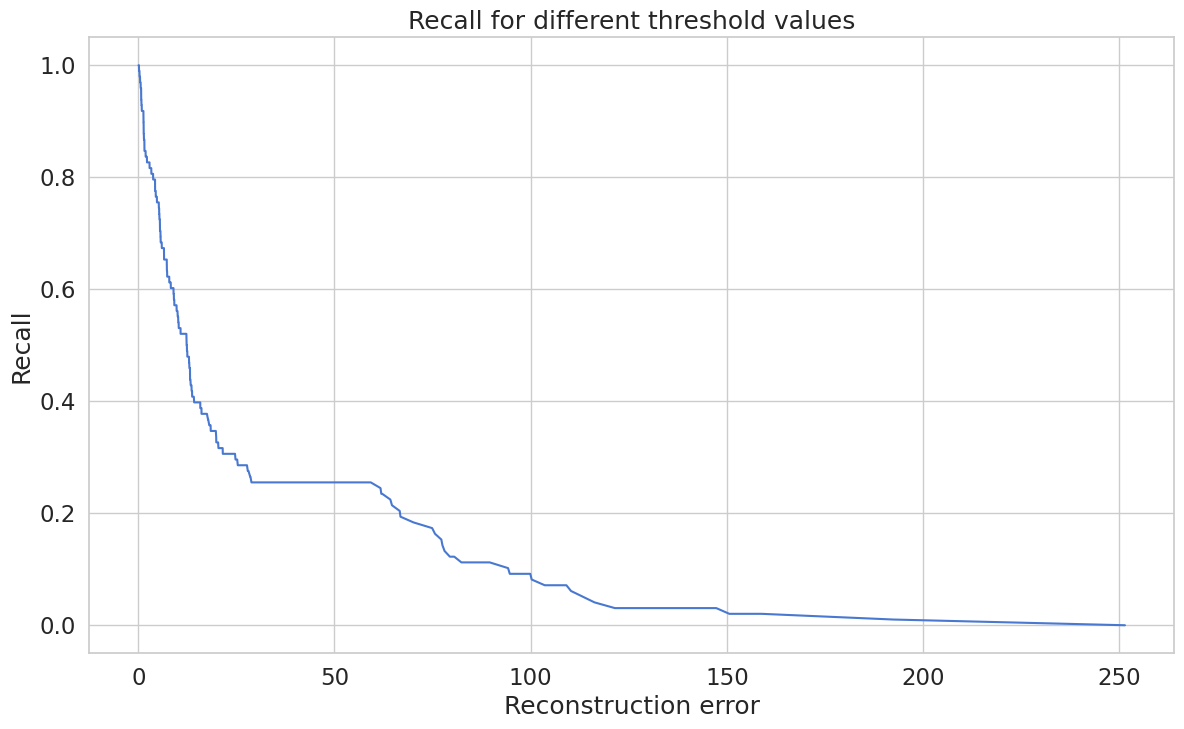

In [161]:
plt.plot(th, recall[1:], 'b', label='Threshold-Recall curve')
plt.title('Recall for different threshold values')
plt.xlabel('Reconstruction error')
plt.ylabel('Recall')
plt.show()

In [162]:
threshold = 2.9

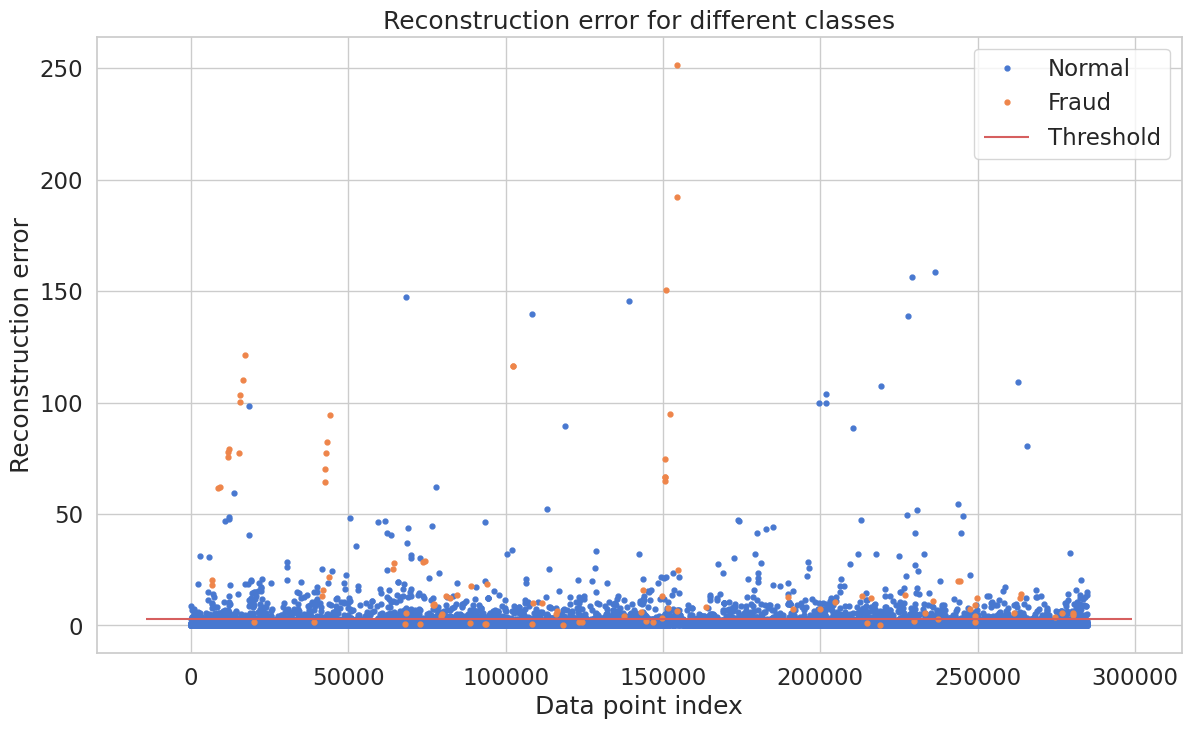

In [163]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();


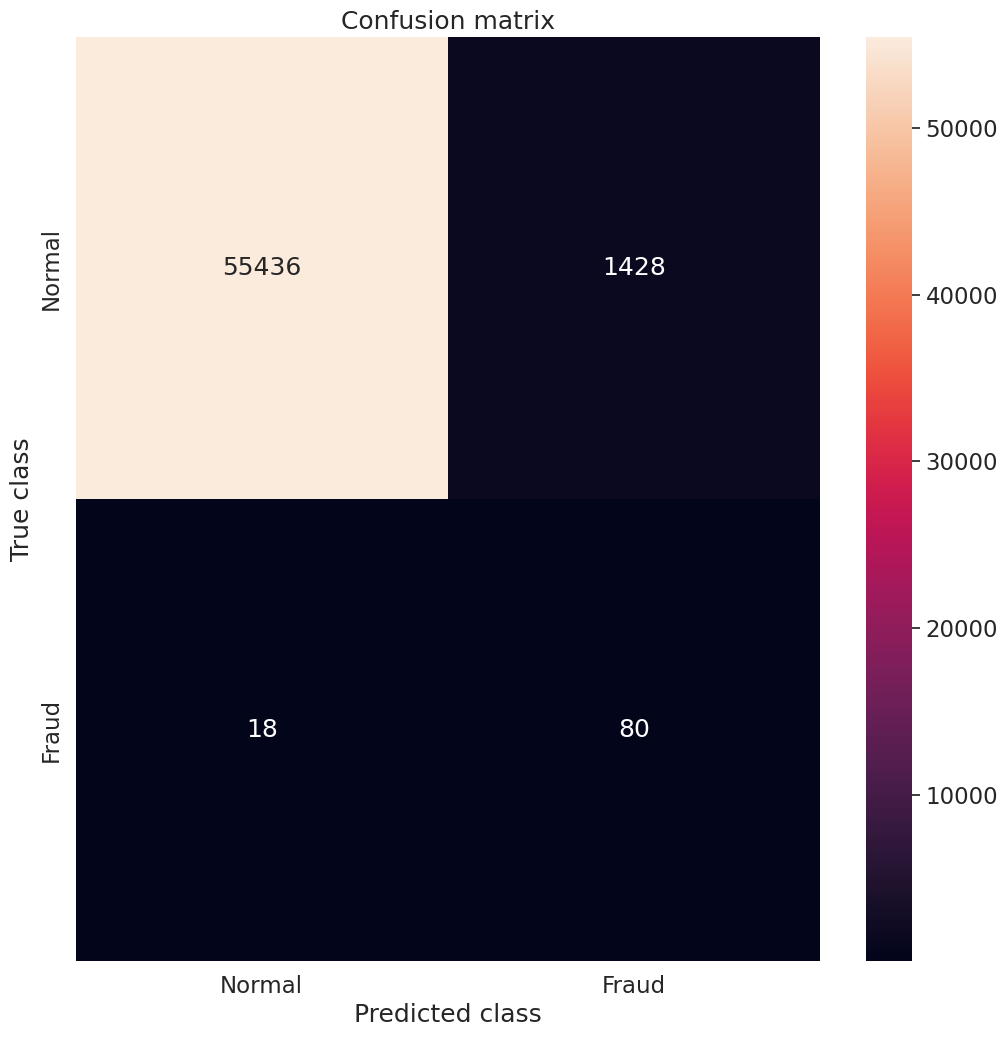

In [164]:
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

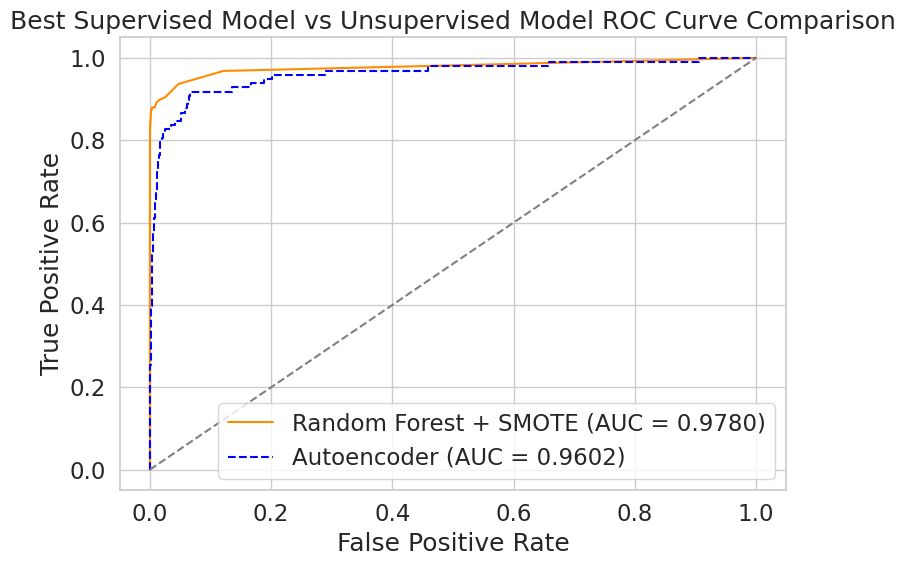

In [165]:
plt.figure(figsize=(8, 6))

# Random Forest ROC
plt.plot(sm_rf_fpr, sm_rf_tpr, color='darkorange', linestyle='-',
         label=f"Random Forest + SMOTE (AUC = {sm_rf_roc_auc:.4f})")

# Autoencoder ROC
plt.plot(fpr_ae, tpr_ae, color='blue', linestyle='--',
         label=f"Autoencoder (AUC = {roc_auc_ae:.4f})")

# Random line (baseline)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.title("Best Supervised Model vs Unsupervised Model ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()
